ORO VERDE - FCYT - INTELIGENCIA ARTIFICIAL - ALGORITMOS GENETICOS
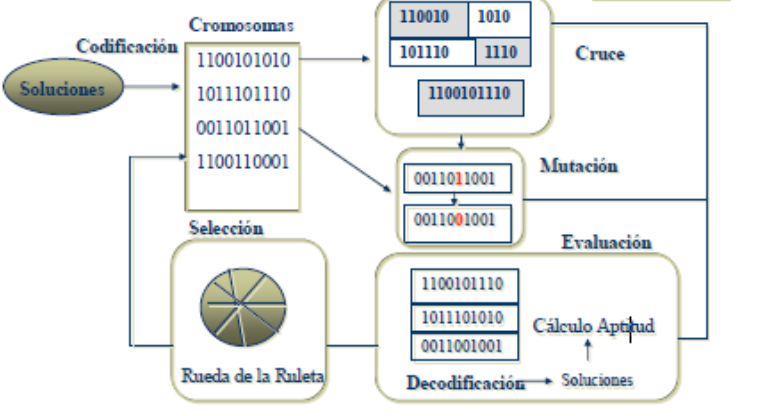

In [ ]:
'''
  Problem: MAX f(x, y) = sin(sqrt(x^2 + y^2)). limits 4 ≥ x ≥ -4 and 4 ≥ y ≥ -4
'''


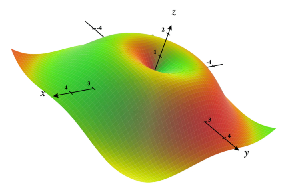

In [ ]:

import random

def generate_population(size, x_boundaries, y_boundaries):
    lower_x_boundary, upper_x_boundary = x_boundaries
    lower_y_boundary, upper_y_boundary = y_boundaries

    population = []
    for i in range(size):
        individual = {
            "x": random.uniform(lower_x_boundary, upper_x_boundary),
            "y": random.uniform(lower_y_boundary, upper_y_boundary),
        }
        population.append(individual)

    return population

In [ ]:
example_population = generate_population(size=10, x_boundaries=(-4, 4), y_boundaries=(-4, 4))
print(example_population)

[{'x': 3.1836505488610465, 'y': 0.6858222824611522}, {'x': -3.7885723474318613, 'y': 1.3841945429967124}, {'x': -2.498855735795817, 'y': 0.18051149687746193}, {'x': 2.782944965394991, 'y': -0.1964776815727749}, {'x': -3.8490026496434426, 'y': -3.9152412736789417}, {'x': -3.402931487653916, 'y': 3.949024651719249}, {'x': -2.677901408100017, 'y': -0.5575766700235416}, {'x': -2.9385866673050316, 'y': -0.6954417858901216}, {'x': 3.3776539155237586, 'y': -1.635948675507473}, {'x': -3.5129680835193797, 'y': -1.844486579596306}]


In [ ]:
import math

def apply_function(individual):
    x = individual["x"]
    y = individual["y"]
    return math.sin(math.sqrt(x ** 2 + y ** 2))


z = apply_function(example_population[0])
print(z)

-0.11483626338996361


In [ ]:
generations = 100

population = generate_population(size=10, x_boundaries=(-4, 4), y_boundaries=(-4, 4))

i = 1
while True:
    print(f" GENERATION {i}")

    for individual in population:
        print(individual)

    if i == generations:
        break

    i += 1


 GENERATION 1
{'x': -1.2893393445862094, 'y': -3.196080699514491}
{'x': -0.966906878290712, 'y': -0.30797794914377974}
{'x': 0.5109710123175235, 'y': -1.9874648059423912}
{'x': 0.43048092816824735, 'y': -3.413107737361889}
{'x': 3.7015699041365284, 'y': 2.348961091458224}
{'x': 3.9653022629551122, 'y': -3.245899161935581}
{'x': -3.978985999867425, 'y': 1.5279535237025605}
{'x': 0.7863417430705555, 'y': 0.2386371648793082}
{'x': -0.7675765215143651, 'y': 0.5804638126814039}
{'x': 0.7847015872238723, 'y': 1.4396950053655413}
 GENERATION 2
{'x': -1.2893393445862094, 'y': -3.196080699514491}
{'x': -0.966906878290712, 'y': -0.30797794914377974}
{'x': 0.5109710123175235, 'y': -1.9874648059423912}
{'x': 0.43048092816824735, 'y': -3.413107737361889}
{'x': 3.7015699041365284, 'y': 2.348961091458224}
{'x': 3.9653022629551122, 'y': -3.245899161935581}
{'x': -3.978985999867425, 'y': 1.5279535237025605}
{'x': 0.7863417430705555, 'y': 0.2386371648793082}
{'x': -0.7675765215143651, 'y': 0.58046381268

Method roulette

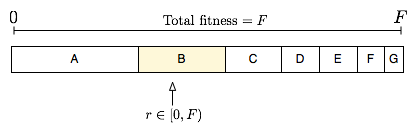

In [ ]:
'''
  Fitness proportionate selection, also known as roulette wheel selection,
  is a genetic operator used in genetic algorithms
  for selecting potentially useful solutions for recombination.
  This could be imagined similar to a Roulette wheel in a casino.
  Usually a proportion of the wheel is assigned to each of the possible
  selections based on their fitness value. This could be achieved by
  dividing the fitness of a selection by the total fitness of all the selections,
  thereby normalizing them to 1. Then a random selection is made similar
  to how the roulette wheel is rotated.


  To select the individuals to reproduce we will use
  a widely adopted method called roulette wheel which consists
  of dividing a circle in portions like a pie chart,
  where each individual has a portion proportional to its fitness,
  and then spinning it. This way we assure best individuals have a better chance of being selected,
  while the worst ones still have a chance, although it is minor.
'''

def choice_by_roulette(sorted_population, fitness_sum):
    offset = 0
    normalized_fitness_sum = fitness_sum

    lowest_fitness = apply_function(sorted_population[0])
    if lowest_fitness < 0:
        offset = -lowest_fitness
        normalized_fitness_sum += offset * len(sorted_population)

    draw = random.uniform(0, 1)

    accumulated = 0
    for individual in sorted_population:
        fitness = apply_function(individual) + offset
        probability = fitness / normalized_fitness_sum #probability of choose ind
        accumulated += probability

        if draw <= accumulated:
            return individual

In [ ]:
def sort_population_by_fitness(population):
    return sorted(population, key=apply_function)


def crossover(individual_a, individual_b):
    xa = individual_a["x"]
    ya = individual_a["y"]

    xb = individual_b["x"]
    yb = individual_b["y"]

    return {"x": (xa + xb) / 2, "y": (ya + yb) / 2} # mean of each axes.

#random mutation for an individual.
def mutate(individual):
    next_x = individual["x"] + random.uniform(-0.05, 0.05)
    next_y = individual["y"] + random.uniform(-0.05, 0.05)

    lower_boundary, uppchoice_by_rouletteer_boundary = (-4, 4)

    # Guarantee we keep inside boundaries
    next_x = min(max(next_x, lower_boundary), uppchoice_by_rouletteer_boundary)
    next_y = min(max(next_y, lower_boundary), uppchoice_by_rouletteer_boundary)

    return {"x": next_x, "y": next_y}

def make_next_generation(previous_population):
    next_generation = []
    sorted_by_fitness_population = sort_population_by_fitness(previous_population)
    population_size = len(previous_population)
    fitness_sum = sum(apply_function(individual) for individual in population)

    for i in range(population_size):
        #select 2
        first_choice = choice_by_roulette(sorted_by_fitness_population, fitness_sum)
        second_choice = choice_by_roulette(sorted_by_fitness_population, fitness_sum)
        '''
          print("first_choice")
          print(first_choice)
          print("second_choice")
          print(second_choice)
        '''
        #cross it
        individual = crossover(first_choice, second_choice)
        #mutate
        individual = mutate(individual)
        next_generation.append(individual)

    return next_generation

In [ ]:
generations = 100

population = generate_population(size=10, x_boundaries=(-4, 4), y_boundaries=(-4, 4))

i = 1
while True:
    print(f"🧬 GENERATION {i}")

    for individual in population:
        print(individual, apply_function(individual))

    if i == generations:
        break

    i += 1

    population = make_next_generation(population)

best_individual = sort_population_by_fitness(population)[-1]
print("\n🔬 FINAL RESULT")
print(best_individual, apply_function(best_individual))

🧬 GENERATION 1
{'x': -1.385366606450888, 'y': 2.974661421013705} -0.13939236495803337
{'x': 1.811910710801671, 'y': -2.594406839688326} -0.02289065634178214
{'x': -2.998629480671643, 'y': -2.9202065506021553} -0.864434167084466
{'x': -1.8150556750160405, 'y': -0.5475416721364477} 0.947635122690663
{'x': -1.9991634758609287, 'y': -1.9082900559106708} 0.3689310416438535
{'x': -0.7637109488598774, 'y': 0.1944025085613319} 0.7089901389735959
{'x': -0.44438591782353676, 'y': 2.2155181195948286} 0.771977823603107
{'x': -0.33835721658422546, 'y': 3.9734988379787817} -0.748824256765799
{'x': 2.8551019882971076, 'y': -3.044936090874555} -0.8585952498245418
{'x': -3.459691811300507, 'y': -2.5151513195832544} -0.9068403408080459
🧬 GENERATION 2
{'x': 0.667859042728015, 'y': -0.21259416852664112} 0.6448900664952371
{'x': -0.5626673962232654, 'y': 1.205505324119924} 0.971232372426803
{'x': -1.3325944889524777, 'y': -0.8164937454232284} 0.9999683517620844
{'x': -1.3731969884993809, 'y': -0.8599635493